# Notas originales: [12 steps to N-S](https://www.theoj.org/jose-papers/jose.00021/10.21105.jose.00021.pdf)

#Ecuación de Laplace
--------
En esta y la siguiente sesión veremos un par de ecuaciones que nos permiten resolver con mayor presición la ecuación de Navier-Stokes, se tratan de las ecuaciones de Laplace y de Poisson. Ambas son muy comunes en física, sobre todo en problemas de electrostática y magnetostática. La ecuación de Laplace se define como

\begin{equation}
\nabla^{2} \phi = 0,
\end{equation}

donde $\phi$ es una función suave bien definida en todo el espacio de estudio. En su versión de dos dimensiones tenemos

\begin{equation}
\frac{\partial^{2} \phi}{\partial x^{2}} + \frac{\partial^{2} \phi}{\partial y^{2}} = 0,
\end{equation}

adimensionalizando y discretizando mediante diferencias centrales obtenemos

\begin{equation}
\frac{\phi_{i+1, j}^n - 2\phi_{i,j}^n + \phi_{i-1,j}^n}{\Delta x^2} + \frac{\phi_{i,j+1}^n - 2\phi_{i,j}^n + \phi_{i, j-1}^n}{\Delta y^2} = 0,
\end{equation}

esta ecuación no es dependiente del tiempo (no hay un término $\phi^{n+1}$), si se realizan las iteraciones para $\phi^{n}_{i,j}$ hasta que la ecuacion llegue a una condicion de equilibrio que nosotros podemos especificar. En si la condicion de equilibrio se alcanza para un número infinito de iteraciones, pero podemos aproximar el estado de equilibrio con una cierta precision deseada.

Despejando para $\phi^{n}_{i,j}$ de la ecuación diferencial discretizada

\begin{equation}
\phi_{i,j}^n = \frac{\Delta y^2(\phi_{i+1,j}^n+\phi_{i-1,j}^n)+\Delta x^2(\phi_{i,j+1}^n + \phi_{i,j-1}^n)}{2(\Delta x^2 + \Delta y^2)}.
\end{equation}

#Ejemplo
----------------
Para este ejemplo escogemos las condiciones de frontera

$\phi=0$ at $x=0$,

$\phi=y$ at $x=2$,

$\frac{\partial \phi}{\partial y}=0$ at $y=0, \ 1$,

para estas condiciones la solución de análitica de la ecuación de Laplace es

\begin{equation}
\phi(x,y)=\frac{x}{4}-4\sum_{n=1,\text{impar}}^{\infty}\frac{1}{(n\pi)^2\sinh2n\pi}\sinh n\pi x\cos n\pi y.
\end{equation}

In [0]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Definimos una función para graficar en tres dimensiones

In [0]:
def plot3D(x, y, phi):
  fig = plt.figure(figsize=(11,7), dpi=100)
  ax = fig.gca(projection='3d')
  X, Y = np.meshgrid(x,y)
  surf = ax.plot_surface(X, Y, phi.transpose(), rstride=1, cstride=1, cmap=cm.viridis, linewidth=0, antialiased=False)
  ax.set_xlim(0, max(x))
  ax.set_ylim(0, max(y))
  ax.set_xlabel("$x$")
  ax.set_ylabel("$y$")

Definimos una función para resolver la ecuación de Laplace.
La solucioón se calcula por método de punto fijo.

In [0]:
def laplace_2D(phi, x, y, precision):
  norma = 1
  phin = np.empty_like(phi)

  dx = (max(x) - min(x))/(len(x) - 1)
  dy = (max(y) - min(y))/(len(y) - 1)

  pasos = 0

  while norma > precision: #las iteraciones se detienen hasta llegar a la precision deseada
    phin = phi.copy()
    for i in range(1, len(x)-1):
      for j in range(1, len(y)-1):
        phi[i, j] = (dy*dy*(phin[i+1, j] + phin[i-1, j]) + dx*dx*(phin[i, j+1] + phin[i, j-1]))/(2.0*(dx*dx + dy*dy))

    phi[0,:] = 0.0 # phi = 0 en x = 0
    phi[-1,:] = y #phi = y en x = 2
    phi[:,0] = phi[:,1] #dphi/dy = 0 en y = 0 
    phi[:,-1] = phi[:,-2] # dphi/dx = 0 en y = 1

    norma = np.sum(np.abs(phi[:]) - np.abs(phin[:]))/np.sum(np.abs(phin[:]))

    pasos += 1

    #condicion de paro, por si nunca llega a la precision deseada
    if(pasos > 1000000):
      break

  return phi

In [0]:
#declaracion de variables
nx = 31
ny = 31
Lx = 2.0
Ly = 1.0

#condiciones iniciales
phi = np.zeros((nx,ny)) #matriz de ceros
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)

#condiciones de frontera
phi[0,:] = 0
phi[-1,:] = y
phi[:,0] = phi[:,1]
phi[:,-1] = phi[:,-2]

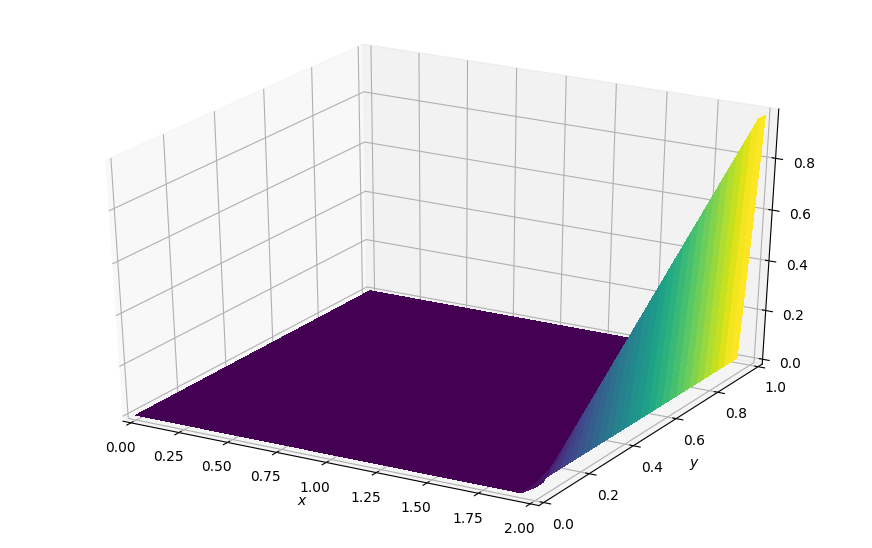

In [0]:
plot3D(x,y,phi)

Ahora llevamos $phi$ al estado de equilibrio con la funcion laplace_2D, si graficamos  con los nuevos valores de $\phi$, obtenemos

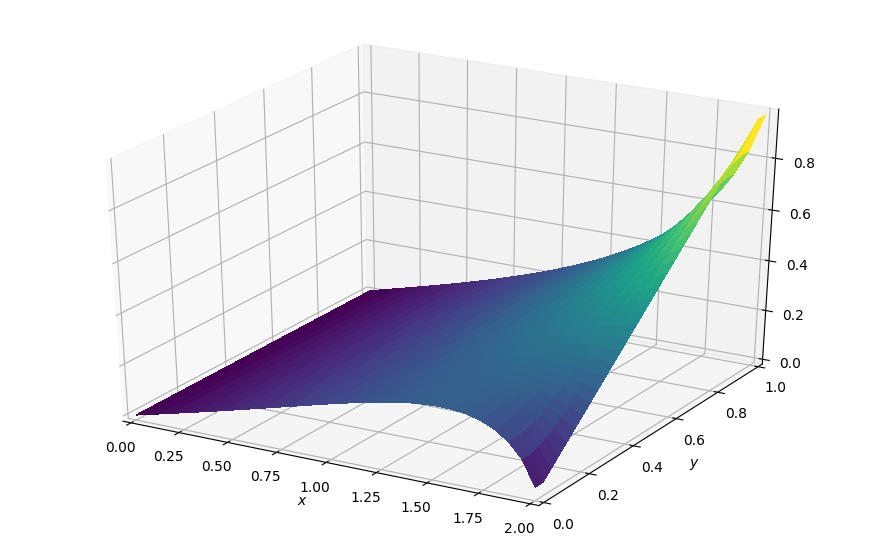

In [0]:
phi = laplace_2D(phi, x, y, 1e-4)
plot3D(x, y, phi)